In [1]:
                                         ''' DATA FORMAT INTERCONVERSION MODULE'''
import math                                 
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import geopandas as gpd
import time
from numba import cuda
# from numba import autojit
from numba.extending import overload
from keplergl import KeplerGl 
import fiona
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
import geopandas as gpd
import time
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
import osmnx as ox, matplotlib.pyplot as plt, pandas as pd, geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon
%matplotlib inline
import os,time
from numba.extending import overload

'''converts json file to dataframe'''
def json_to_dataframe_converter():
    
    df = pd.DataFrame({'city': ['Berlin', 'Paris', 'Munich'],
                      'latitude': [52.518611111111, 48.856666666667, 48.137222222222],
                      'longitude': [13.408333333333, 2.3516666666667, 11.575555555556]})
    gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                          crs={'init': 'epsg:4326'},
                          geometry=[shapely.geometry.Point(xy)
                                    for xy in zip(df.longitude, df.latitude)])
    print({'city': ['Berlin', 'Paris', 'Munich'],
                      'latitude': [52.518611111111, 48.856666666667, 48.137222222222],
                      'longitude': [13.408333333333, 2.3516666666667, 11.575555555556]})
    print(gdf)




'''converts csv or text file to geopandas dataframe '''
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import Point


def csv_to_dataframe():
    url = 'http://www2.census.gov/geo/docs/maps-data/data/gazetteer/2016_Gazetteer/2016_Gaz_zcta_national.zip'
    zips = pd.read_csv(url, dtype={'GEOID' : 'str'},sep='\t', usecols=[0,5,6])
    zips.columns = zips.columns.str.strip() #some column cleanup
    print (len(zips))
    print (zips.head())
    geom = zips.apply(lambda x : Point([x['INTPTLONG'],x['INTPTLAT']]),axis=1)
    zips = gpd.GeoDataFrame(zips, geometry=geom) #geom is a Series
    zips.crs = {'init' :'epsg:4326'}
    print (zips.head())


In [3]:
                     ''' VISUALIZATION SERVICE '''
    
def visualizer():
        map_1 = KeplerGl(height=500)
        map_2 = KeplerGl(height=500)
        map_3 = KeplerGl(height=500)
        
        shape1 = "2012/Albany_County/tl_2012_36001_edges.shp"
        shape2 = "2013/Albany_County/tl_2013_36001_edges.shp"
        
        gpdshape1 = gpd.read_file(shape1)
        gpdshape2 = gpd.read_file(shape2)
        
        map_1.add_data(data=gpdshape1, name="2015zcta")
        map_1.save_to_html(file_name='2012Albany_County.html', read_only=True)
        
        print('Done!')
        
        map_2.add_data(data=gpdshape1, name="2016zcta")
        map_2.save_to_html(file_name='2013Albany_County.html', read_only=True)
        
        print('Done!')
        
        join_result = gpd.sjoin(gpdshape1, gpdshape2, how="inner", op='contains')
        
        map_3.add_data(data=join_result, name="join_result")
        map_3.save_to_html(file_name='join_result.html', read_only=True)
        
def visualize_file(shape):
    map_ = KeplerGl(height=500)
    gpdshape1 = gpd.read_file(shape)
    map_.add_data(data=gpdshape1, name=shape+"zcta")
    shape = shape.split('.')[-2]
    shape = shape.split('/')[-1]
    map_.save_to_html(file_name='Visualizations/' + shape + '.html', read_only=True)    
    
def  visualize_join(shape_1, shape_2):
    
    map_1 = KeplerGl(height=500)
    gpdshape1 = gpd.read_file(shape_1)
    
    map_2 = KeplerGl(height=500)
    gpdshape2 = gpd.read_file(shape_2)
    
    map_3 = KeplerGl(height=500)
    join_result = gpd.sjoin(gpdshape1, gpdshape2, how="inner", op='contains')
    map_3.add_data(data=join_result, name="join_result")
    map_3.save_to_html(file_name='Visualizations/join_result.html', read_only=True)

In [4]:
visualize_file("Datasets/gadm36_IND_0.shp")
visualize_file("Datasets/gadm36_IND_1.shp")
visualize_file("Datasets/gadm36_IND_2.shp")
visualize_file("Datasets/gadm36_IND_3.shp")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to Visualizations/gadm36_IND_2.html!
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to Visualizations/gadm36_IND_3.html!


In [21]:
                    '''Average Vertices Service'''

def avg_vert(fp):
    data_fp = gpd.read_file(fp)
    shape = fiona.open(fp)
    total=0
    count=0
    try:
        while(True):
            feature=shape.next()
            total+=len(feature['geometry']['coordinates'][0])
            count+=1
    except:
        return [total,count,math.ceil(total/count)]


In [5]:
                            '''SJOIN ON CPU Service'''
def sjoin_on_cpu():
    fun4()
def fun4():
        start_time=time.time()
        fp1 = "2012/Ada_County/tl_2012_16001_edges.shp"
        fp2 = "2013/Ada_County/tl_2013_16001_edges.shp"
        pop1 = gpd.read_file(fp1)
        pop2 = gpd.read_file(fp2)
        op=gpd.sjoin(pop1,pop2,how="inner",op="intersects")
        print(time.time()-start_time)
        print(op)

In [6]:
                            '''SJOIN ON GPU Service'''
from numba.extending import overload

def func():
    start_time=time.time()
    fp1 = "2012/Ada_County/tl_2012_16001_edges.shp"
    fp2 = "2013/Ada_County/tl_2013_16001_edges.shp"
    pop1 = gpd.read_file(fp1)
    pop2 = gpd.read_file(fp2)
    start_time = time.time()
    op=gpd.sjoin(pop1,pop2,how="inner",op="intersects")
    print(time.time()-start_time)
    print(op)
    
@overload(func)
def sjoin_on_gpu():
    func()


In [7]:
                            '''SPATIAL JOIN ON CPU Service without splitting'''
def sjoin_without_splitting_cpu():
    
    gdf = ox.gdf_from_place('Mumbai, Maharashtra,India')
    
    west, south, east, north = gdf.unary_union.buffer(0.05).bounds
    G = ox.graph_from_bbox(north, south, east, west, network_type='all', retain_all=True)
    xy = [(data['x'], data['y']) for node, data in G.nodes(data=True)]
    x, y = list(zip(*xy))
    points = gpd.GeoDataFrame(data={'x':x, 'y':y})
    points.crs = gdf.crs
    points.name = 'nodes'
    points['geometry'] = points.apply(lambda row: Point((row['x'], row['y'])), axis=1)
    west, south, east, north = gdf.unary_union.bounds
    fig, ax = plt.subplots(figsize=(6,6))
    geometry = gdf['geometry'].iloc[0]
    if isinstance(geometry, Polygon):
        geometry = MultiPolygon([geometry])
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    start=time.time()
    west, south, east, north = points.unary_union.bounds
    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.scatter(x=points['x'], y=points['y'], s=1, c='m', linewidth=0, zorder=1)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    start = time.time()
  
    sindex = points.sindex
    possible_indices = list(sindex.intersection(geometry.bounds))
    possible_matches = points.iloc[possible_indices]
    precise_matches = possible_matches[possible_matches.intersects(geometry)]

    points_within_geometry = precise_matches
    points_outside_geometry = points[~points.isin(points_within_geometry)]
    print(len(points_within_geometry)+len(points_outside_geometry))
    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=3)
        ax.add_patch(patch)

    ax.scatter(x=points_outside_geometry['x'], y=points_outside_geometry['y'], s=1, c='r', linewidth=0, zorder=1)
    ax.scatter(x=points_within_geometry['x'], y=points_within_geometry['y'], s=1, c='b', linewidth=0, zorder=2)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    print(start-time.time())


In [8]:
                                '''SPATIAL JOIN ON GPU Service without splitting'''
def function1(gdf,west, south, east, north,G):
    xy = [(data['x'], data['y']) for node, data in G.nodes(data=True)]
    x, y = list(zip(*xy))
    gdf_nodes = gpd.GeoDataFrame(data={'x':x, 'y':y})
    gdf_nodes.crs = gdf.crs
    gdf_nodes.name = 'nodes'
    gdf_nodes['geometry'] = gdf_nodes.apply(lambda row: Point((row['x'], row['y'])), axis=1)
    west, south, east, north = gdf.unary_union.bounds
    fig, ax = plt.subplots(figsize=(6,6))
    geometry = gdf['geometry'].iloc[0]
    if isinstance(geometry, Polygon):
        geometry = MultiPolygon([geometry])
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
   
    west, south, east, north = gdf_nodes.unary_union.bounds
    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.scatter(x=gdf_nodes['x'], y=gdf_nodes['y'], s=1, c='m', linewidth=0, zorder=1)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()

    start = time.time()
    sindex = gdf_nodes.sindex

    possible_indices = list(sindex.intersection(geometry.bounds))
    possible_matches = gdf_nodes.iloc[possible_indices]
    precise_matches = possible_matches[possible_matches.intersects(geometry)]

    points_within_geometry = precise_matches
    points_outside_geometry = gdf_nodes[~gdf_nodes.isin(points_within_geometry)]
#     print(len(points_within_geometry)+len(points_outside_geometry))
    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=3)
        ax.add_patch(patch)

    ax.scatter(x=points_outside_geometry['x'], y=points_outside_geometry['y'], s=1, c='r', linewidth=0, zorder=1)
    ax.scatter(x=points_within_geometry['x'], y=points_within_geometry['y'], s=1, c='b', linewidth=0, zorder=2)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    print("time taken(without splitting)", time.time()-start)
@overload(function1)
def sjoin_without_splitting_gpu(gdf,west,south,east,north,G):
    function1(gdf,west,south,east,north,G)


In [9]:
                                     '''SPATIAL JOIN ON CPU Service with splitting'''
import osmnx as ox, matplotlib.pyplot as plt, pandas as pd, geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon
%matplotlib inline

def sjoin_with_splitting_cpu():
    
    gdf = ox.gdf_from_place('Los Angeles, California', 'USA')
    west, south, east, north = gdf.unary_union.bounds
    G = ox.graph_from_bbox(north, south, east, west, network_type='all', retain_all=True)
    xy = [(data['x'], data['y']) for node, data in G.nodes(data=True)]
    x, y = list(zip(*xy))

    gdf_nodes = gpd.GeoDataFrame(data={'x':x, 'y':y})
    gdf_nodes.crs = gdf.crs
    gdf_nodes.name = 'nodes'
    gdf_nodes['geometry'] = gdf_nodes.apply(lambda row: Point((row['x'], row['y'])), axis=1)
    west, south, east, north = gdf_nodes.unary_union.bounds
    geometry = gdf['geometry'].iloc[0]
    if isinstance(geometry, Polygon):
        geometry = MultiPolygon([geometry])


    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.scatter(x=gdf_nodes['x'], y=gdf_nodes['y'], s=1, c='m', linewidth=0, zorder=1)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    start = time.time()
    geometry_cut = ox.quadrat_cut_geometry(geometry, quadrat_width=0.1)

    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry_cut:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()

    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry_cut:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.scatter(x=gdf_nodes['x'], y=gdf_nodes['y'], s=1, c='m', linewidth=0, zorder=1)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    sindex = gdf_nodes.sindex
    points_within_geometry = pd.DataFrame()
    for poly in geometry_cut:
        # buffer by the <1 micron dist to account for any space lost in the quadrat cutting
        # otherwise may miss point(s) that lay directly on quadrat line
        poly = poly.buffer(1e-14).buffer(0)

        # find approximate matches with r-tree, then precise matches from those approximate ones
        possible_indices = list(sindex.intersection(poly.bounds))
        possible_matches = gdf_nodes.iloc[possible_indices]
        precise_matches = possible_matches[possible_matches.intersects(poly)]
        points_within_geometry = points_within_geometry.append(precise_matches)
    points_within_geometry = points_within_geometry.drop_duplicates(subset=['x', 'y'])
    points_outside_geometry = gdf_nodes[~gdf_nodes.isin(points_within_geometry)]
    points_within_geometry = points_within_geometry.drop_duplicates(subset=['x', 'y'])
    points_outside_geometry = gdf_nodes[~gdf_nodes.isin(points_within_geometry)]
    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=3)
        ax.add_patch(patch)

    ax.scatter(x=points_outside_geometry['x'], y=points_outside_geometry['y'], s=1, c='r', linewidth=0, zorder=1)
    ax.scatter(x=points_within_geometry['x'], y=points_within_geometry['y'], s=1, c='b', linewidth=0, zorder=2)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    print(time.time()-start)

In [23]:
                                        '''SPATIAL JOIN ON GPU Service with splitting'''
import osmnx as ox, matplotlib.pyplot as plt, pandas as pd, geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon
%matplotlib inline

def function2(gdf,west, south, east, north,G):
    

    xy = [(data['x'], data['y']) for node, data in G.nodes(data=True)]
    x, y = list(zip(*xy))

    points = gpd.GeoDataFrame(data={'x':x, 'y':y})
    points.crs = gdf.crs
    points.name = 'nodes'
    points['geometry'] = points.apply(lambda row: Point((row['x'], row['y'])), axis=1)
    west, south, east, north = points.unary_union.bounds
    geometry = gdf['geometry'].iloc[0]
    if isinstance(geometry, Polygon):
        geometry = MultiPolygon([geometry])


    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.scatter(x=points['x'], y=points['y'], s=1, c='m', linewidth=0, zorder=1)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    
#     geometry_cut = ox.quadrat_cut_geometry(geometry, quadrat_width=0.1) -> changed to the following code
    geometry_cut = ox.utils_geo._quadrat_cut_geometry(geometry, quadrat_width=0.1)

    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry_cut:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()

    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry_cut:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
        ax.add_patch(patch)

    ax.scatter(x=points['x'], y=points['y'], s=1, c='m', linewidth=0, zorder=1)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    start=time.time()
    sindex = points.sindex
    points_within_geometry = pd.DataFrame()

    for poly in geometry_cut:
        # buffer by the <1 micron dist to account for any space lost in the quadrat cutting
        # otherwise may miss point(s) that lay directly on quadrat line
        poly = poly.buffer(1e-14).buffer(0)

        # find approximate matches with r-tree, then precise matches from those approximate ones
        possible_indices = list(sindex.intersection(poly.bounds))
        possible_matches = points.iloc[possible_indices]
        precise_matches = possible_matches[possible_matches.intersects(poly)]
        points_within_geometry = points_within_geometry.append(precise_matches)
    points_within_geometry = points_within_geometry.drop_duplicates(subset=['x', 'y'])
    points_outside_geometry = points[~points.isin(points_within_geometry)]
    points_within_geometry = points_within_geometry.drop_duplicates(subset=['x', 'y'])
    points_outside_geometry = points[~points.isin(points_within_geometry)]
    fig, ax = plt.subplots(figsize=(6,6))
    for polygon in geometry_cut:
        patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=3)
        ax.add_patch(patch)

    ax.scatter(x=points_outside_geometry['x'], y=points_outside_geometry['y'], s=1, c='r', linewidth=0, zorder=1)
    ax.scatter(x=points_within_geometry['x'], y=points_within_geometry['y'], s=1, c='b', linewidth=0, zorder=2)

    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.show()
    print(time.time()-start)
    
@overload(function2)
def sjoin_with_splitting_gpu(gdf,west,south,east,north,G):
    function2(gdf,west,south,east,north,G)

In [11]:
json_to_dataframe_converter()

{'city': ['Berlin', 'Paris', 'Munich'], 'latitude': [52.518611111111, 48.856666666667, 48.137222222222], 'longitude': [13.408333333333, 2.3516666666667, 11.575555555556]}
     city                   geometry
0  Berlin  POINT (13.40833 52.51861)
1   Paris   POINT (2.35167 48.85667)
2  Munich  POINT (11.57556 48.13722)


/home/sjoin/capstone/capstone_venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
csv_to_dataframe()

33144
   GEOID   INTPTLAT  INTPTLONG
0  00601  18.180555 -66.749961
1  00602  18.361945 -67.175597
2  00603  18.455183 -67.119887
3  00606  18.158345 -66.932911
4  00610  18.295366 -67.125135
   GEOID   INTPTLAT  INTPTLONG                    geometry
0  00601  18.180555 -66.749961  POINT (-66.74996 18.18055)
1  00602  18.361945 -67.175597  POINT (-67.17560 18.36195)
2  00603  18.455183 -67.119887  POINT (-67.11989 18.45518)
3  00606  18.158345 -66.932911  POINT (-66.93291 18.15835)
4  00610  18.295366 -67.125135  POINT (-67.12514 18.29537)


/home/sjoin/capstone/capstone_venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
# avg_vert('zcta2015/tl_2015_us_zcta510.shp') -> file doesn't exist

In [16]:
# sjoin_on_cpu() -> file doesn't exist

In [17]:
# sjoin_on_gpu() -> file doesn't exist

In [4]:
visualizer()
# -> file doesn't exist

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


DriverError: gadm36_IND_0.shp: No such file or directory

In [2]:
# gdf = ox.gdf_from_place ('Los Angeles, California, USA') -> changed to the following code
gdf = ox.geocode_to_gdf('Los Angeles, California, USA')
west, south, east, north = gdf.unary_union.bounds
G = ox.graph_from_bbox(north, south, east, west, network_type='all', retain_all=True)

In [3]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

/home/sjoin/capstone/capstone_venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  


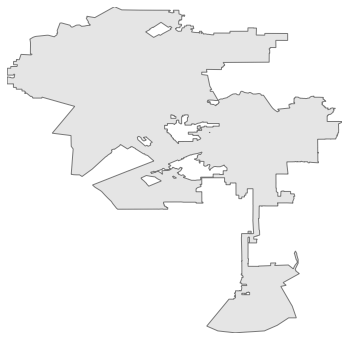

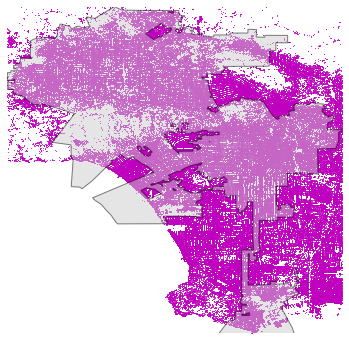

463010


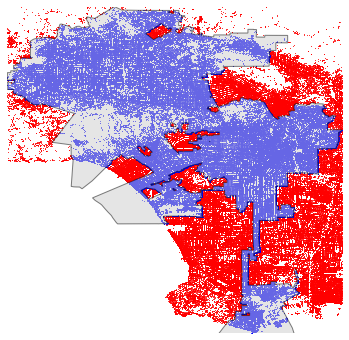

384.8490047454834


In [21]:
sjoin_without_splitting_gpu(gdf,west,south,east,north,G)

/home/sjoin/capstone/capstone_venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  


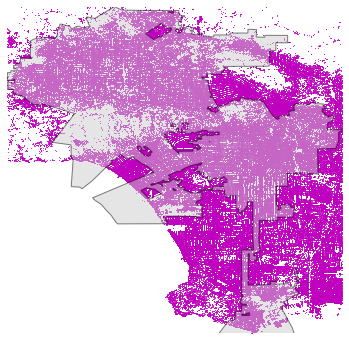

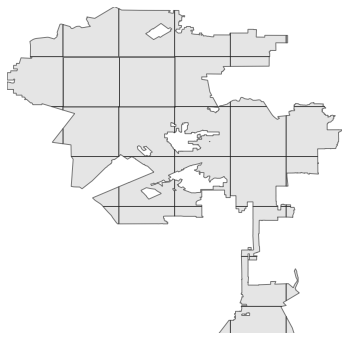

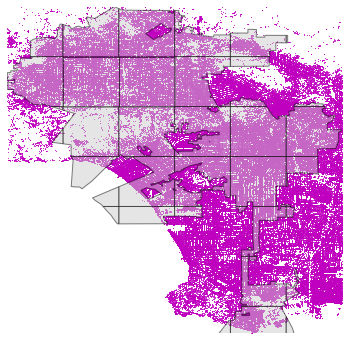

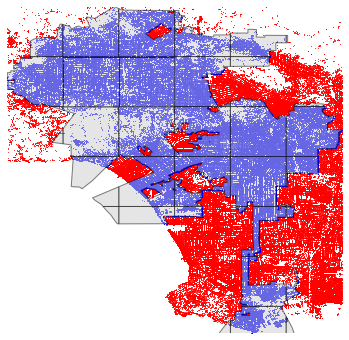

30.819307565689087


In [24]:
sjoin_with_splitting_gpu(gdf,west,south,east,north,G)